<h1><center> Missing Data Imputation</center></h1>
<h3><center> Bin Yu, Nuoya Rezsonya, Yejur Singh Kunwar, Iram Bakhtiar</center></h3>

Requirements:

Step 1:
Using Sklearn get the Boston Housing dataset.
Fit a linear regressor to the data as a baeline.  There is no need to do Cross-Validation.  We are exploring the change in results

What is the loss and what are the goodness of fit parameters?  This will be our baseline for comparison

Step 2: (repeated)
For select between 1, 5 10, 20, 33, and 50% of your data on a single column (Completely at random), replace the present value with a NAN and then perform an imputation of that value.   

In. each case perform a fit with the imputed data and compare the loss and goodness of fit to your baseline.

Step 3: Take 2 different columns and create data “Missing at Random” when controlled for a third variable (i.e if Variable Z is > 30, than Variables X, Y are randomly missing).  Make runs with 10%, 20% and 30% missing data imputed via your best guess.  Repeat your fit and comparisons to the baseline.

Step 4:  Create a Missing Not at Random pattern in which 25% of the data is missing for a single column.    Impute your data, fit the results and compare to a baseline.

Step 5 (Extra Credit) (10 points):  Using the MCMC method, and your data from step 4, What is the difference in performance between imputation via ‘guess’ (mean/median, etc) and MCMC.


# Contents

1. [Abstract](#Abstract)
2. [Introduction](#Introduction)
3. [Background](#Background)
4. [Methods](#Methods)
5. [Results](#Results)
6. [Conclusion](#Conclusion)
7. [References](#References)
8. [Appendix: Code](#Appendix)

# Abstract




[Back to Contents](#Contents)

# Introduction

Boston Housing Dataset Definition:

* The Boston Housing Dataset
The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:
    * CRIM - per capita crime rate by town
    * ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
    * INDUS - proportion of non-retail business acres per town.
    * CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    * NOX - nitric oxides concentration (parts per 10 million)
    * RM - average number of rooms per dwelling
    * AGE - proportion of owner-occupied units built prior to 1940
    * DIS - weighted distances to five Boston employment centres
    * RAD - index of accessibility to radial highways
    * TAX - full-value property-tax rate per \\$10,000
    * PTRATIO - pupil-teacher ratio by town
    * B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    * LSTAT -  \% lower status of the population
    * MEDV - Median value of owner-occupied homes in \\$1000's




[Back to Contents](#Contents)

# Background




[Back to Contents](#Contents)

# Methods




[Back to Contents](#Contents)

# Results




[Back to Contents](#Contents)

# Conclusion




[Back to Contents](#Contents)

# References

[1] https://www.kaggle.com/prasadperera/the-boston-housing-dataset

[2] https://datascience.stackexchange.com/questions/30245/is-there-a-way-to-replace-existing-values-with-nan?rq=1

[3] https://www.kaggle.com/prasadperera/the-boston-housing-dataset

[4] https://sdsawtelle.github.io/blog/output/mcmc-in-python-with-pymc.html
[Back to Contents](#Contents)

# Appendix: Codes




[Back to Contents](#Contents)

In [ ]:
#!pip install ml_metrics 
#!pip install pymc 

### Import Packages

In [2]:
import numpy as np
import pandas as pd
import csv
from sklearn.linear_model import LinearRegression
import seaborn as sns;
from sklearn.metrics import mean_absolute_error, make_scorer, mean_squared_error, r2_score 
from ml_metrics import rmse
import matplotlib.pyplot as plt
import warnings
import random
from sklearn import preprocessing
import pymc 
log = np.log
pi = np.pi

warnings.simplefilter('ignore')

%matplotlib inline

### Import data and exploring

In [3]:
# import data from csv file
# dataset downloaded from https://github.com/selva86/datasets/blob/master/BostonHousing.csv

file ="BostonHousing.csv"
df_housing = pd.read_csv(file) 

In [4]:
df_housing.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
b          506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [6]:
df_housing = df_housing.astype({"chas": float, "rad": float, "tax": float})

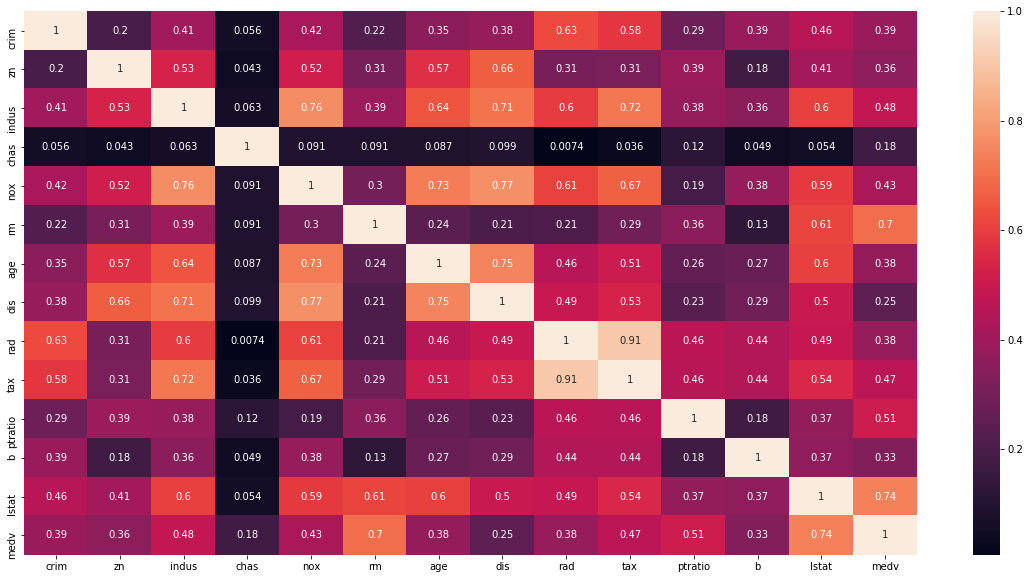

In [7]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_housing.corr().abs(),  annot=True)

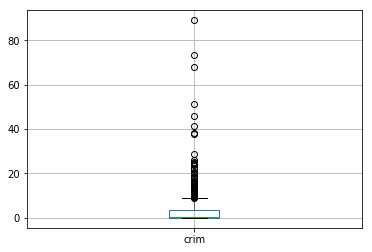

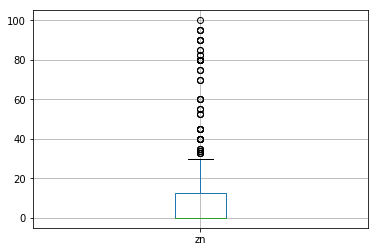

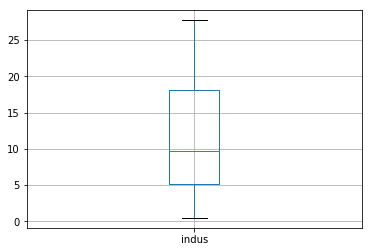

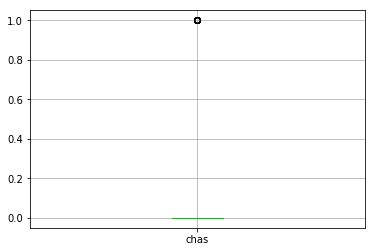

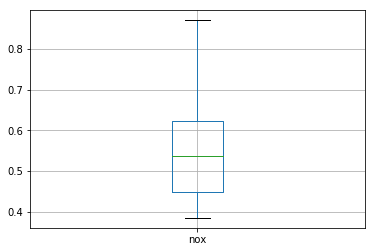

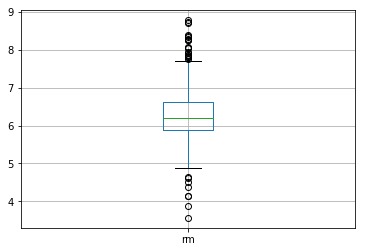

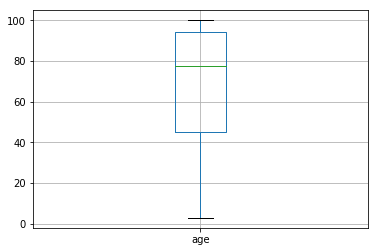

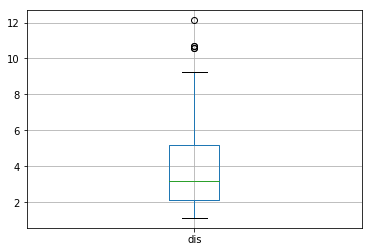

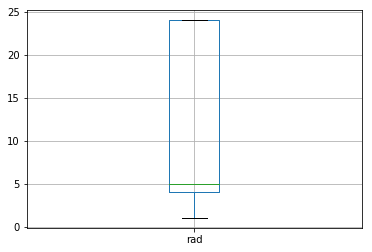

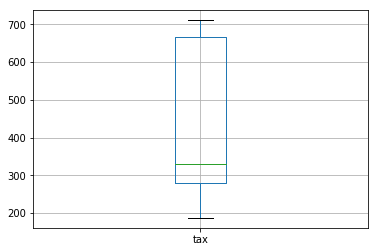

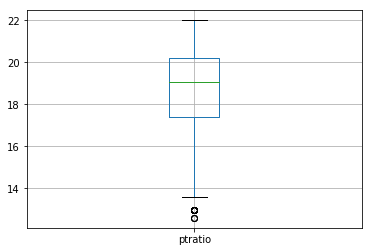

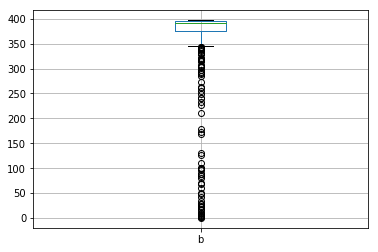

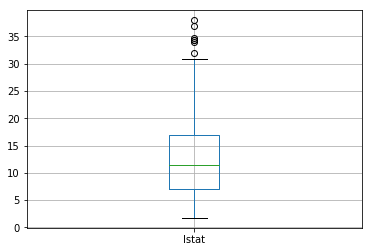

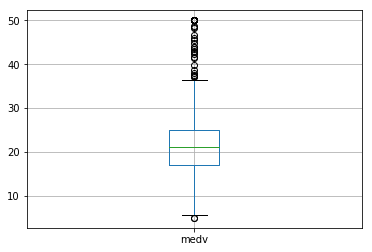

In [8]:


for column in df_housing:
    plt.figure()
    df_housing.boxplot([column])

### Step 1:
Using Sklearn get the Boston Housing dataset.
Fit a linear regressor to the data as a baeline.  There is no need to do Cross-Validation.  We are exploring the change in results

What is the loss and what are the goodness of fit parameters?  This will be our baseline for comparison

In [9]:
column_sels = ['crim','zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax','ptratio','b','lstat']
X = df_housing.loc[:,column_sels]
y = df_housing['medv']

* standarnize 

In [10]:
# dataframe to hold the results
i = 0 # number of models
results = pd.DataFrame(columns=['Model','MAE','MSE','RMSE','R2'])


In [11]:

def linear_model(X, y,ModelName):
    results=[]
    lr = LinearRegression(normalize=True)
    lreg = lr.fit(X, y)
    yhat = lreg.predict(X)
    mae = mean_absolute_error(y,yhat)
    mse = mean_squared_error(y,yhat)
    RMSE = rmse(y,yhat)
    r2 = r2_score(y,yhat)
#     print("MAE: %.3f"%mae)
#     print("MSE:  %.3f"%mse)
#     print("RMSE:  %.3f"%RMSE)
#     print("R2:  %.3f"%r2)
    results.append([ModelName,mae,mse,RMSE,r2])
    return results

In [12]:
results.loc[i] = linear_model(X,y,'Original')[0]

In [13]:
results

,Model,MAE,MSE,RMSE,R2
0,Original,3.270863,21.894831,4.679191,0.740643


###  Add boxplot for all of the variable

### Step 2: (repeated)
For select between 1, 5 10, 20, 33, and 50% of your data on a single column (Completely at random), replace the present value with a NAN and then perform an imputation of that value.   

In. each case perform a fit with the imputed data and compare the loss and goodness of fit to your baseline.

In [14]:
results1 = results.copy()

In [15]:
# function to randomly drop out the values from a data frame
# credit : https://datascience.stackexchange.com/questions/30245/is-there-a-way-to-replace-existing-values-with-nan?rq=1
# changed the percent to prop for later on for MAR
def dropout(data, prop):
    # create a copy
    mat = data.copy()
    # number of values to replace
    #prop = int(mat.size * percent)
    # indices to mask
    if(prop>mat.size):
        prop=mat.size
    
    mask = random.sample(range(mat.size), prop)
    # replace with NaN
    np.put(mat, mask, [np.NaN]*len(mask))
    return mat

* we select rm as the imputation column as we think this column has more corrolation with the response variable.

In [16]:
# define imput parameters
imputeList1 = [0.01,0.05,0.1,0.2,0.33,0.50]
imputeCol = 'rm'

In [18]:
# create MCAR in rm column and impute the data with mean and fit the linear model
i=1
for imputePerct in imputeList1:
    #print(imputePerct)
    X_new =X.copy()
    # propotion to dropout
    prop = int(X_new[imputeCol].size * imputePerct)
    X_new[imputeCol]= dropout(X_new[imputeCol], prop)
    print("Dropped out number of values in column ",imputeCol,":",X_new[imputeCol].isna().sum())
    #print(X_new[imputeCol])
    X_new[imputeCol]=X_new[imputeCol].fillna(X_new[imputeCol].mean())
    
    results1.loc[i]=linear_model(X_new,y,'MCAR '+ str(imputePerct*100)+'%')[0]
    i+=1
    


Dropped out number of values in column  rm : 5
Dropped out number of values in column  rm : 25
Dropped out number of values in column  rm : 50
Dropped out number of values in column  rm : 101
Dropped out number of values in column  rm : 166
Dropped out number of values in column  rm : 253


In [19]:
results1

,Model,MAE,MSE,RMSE,R2
0,Original,3.270863,21.894831,4.679191,0.740643
1,MCAR 1.0%,3.291124,22.059481,4.696752,0.738692
2,MCAR 5.0%,3.265393,21.548350,4.642020,0.744747
3,MCAR 10.0%,3.371361,22.763416,4.771102,0.730354
4,MCAR 20.0%,3.357118,22.823863,4.777433,0.729638
5,MCAR 33.0%,3.531190,24.919072,4.991901,0.704819
6,MCAR 50.0%,3.490240,23.634727,4.861556,0.720033


* when MCAR percentage increasing MAE increasing.

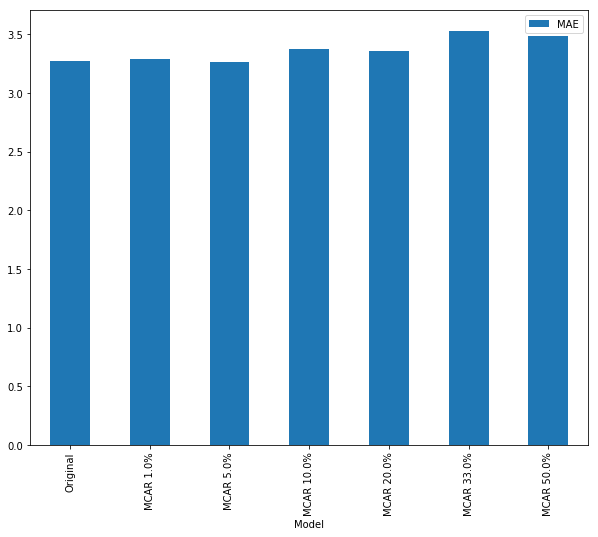

In [20]:

ax = results1.plot(kind='bar', x='Model',y='MAE', figsize  = (10,8) )

### Step 3: 
Take 2 different columns and create data “Missing at Random” when controlled for a third variable (i.e if Variable Z is > 30, than Variables X, Y are randomly missing).  Make runs with 10%, 20% and 30% missing data imputed via your best guess.  Repeat your fit and comparisons to the baseline.

* impute column b and lstat when rad greater than 4

In [21]:
# define imput parameters
imputeList2 = [0.1,0.2,0.30]
imputeCols = ['b','lstat']

In [22]:
results2 = results.copy()

In [23]:
# create MAR in b and lstat columns and impute the data with mean and fit the linear model
i=1
for imputePerct in imputeList2:
    #print(imputePerct)
    X_new =X.copy()
    # propotion to dropout
    
    X_new_keep = X[X['rad']<=4]
    X_new_input=X[X['rad']>4]
    
    for imputcol in imputeCols:
        prop = int(X_new[imputeCol].size * imputePerct)

        X_new_input[imputeCol]= dropout(X_new_input[imputeCol], prop)
        print("Dropped out number of values in column ",imputeCol,":",X_new_input[imputeCol].isna().sum())
        #print(X_new[imputeCol])
        X_new_input[imputeCol]=X_new_input[imputeCol].fillna(X_new[imputeCol].mean())
        
    # combine 2 data frame back
    X_new_final = pd.concat([X_new_keep,X_new_input],axis=0)
    # fit the model with final data set.
    results2.loc[i]=linear_model(X_new_final,y,'MAR '+ str(imputePerct*100)+'%')[0]
    i+=1
    

Dropped out number of values in column  rm : 50
Dropped out number of values in column  rm : 50
Dropped out number of values in column  rm : 101
Dropped out number of values in column  rm : 101
Dropped out number of values in column  rm : 151
Dropped out number of values in column  rm : 151


In [24]:
results2

,Model,MAE,MSE,RMSE,R2
0,Original,3.270863,21.894831,4.679191,0.740643
1,MAR 10.0%,5.585189,61.012075,7.811023,0.277276
2,MAR 20.0%,5.585805,61.012223,7.811032,0.277274
3,MAR 30.0%,5.570028,60.878886,7.802492,0.278853


### Step 4:  
Create a Missing Not at Random pattern in which 25% of the data is missing for a single column.    Impute your data, fit the results and compare to a baseline.

* imput column tax with MNAR when tax <=279 (25%)

In [25]:
results3 = results.copy()
imputeCol = 'tax'

In [26]:
X[imputeCol].describe()


count    506.000000
mean     408.237154
std      168.537116
min      187.000000
25%      279.000000
50%      330.000000
75%      666.000000
max      711.000000
Name: tax, dtype: float64

In [40]:
twentyFive = X[imputeCol].quantile(.25)
imputeMean = X[imputeCol].mean()

In [41]:
X_new_imput =X
X_new_imput[X_new_imput['tax']<=twentyFive] =imputeMean

In [44]:
i=1
results3.loc[i]=linear_model(X_new_imput,y,'MNAR 25%')[0]


In [45]:
results3

,Model,MAE,MSE,RMSE,R2
0,Original,3.270863,21.894831,4.679191,0.740643
1,MNAR 25%,4.243986,37.369323,6.113045,0.557338


### Step 5 (Extra Credit) (10 points):  
Using the MCMC method, and your data from step 4, What is the difference in performance between imputation via ‘guess’ (mean/median, etc) and MCMC.

In [1]:
#credit: https://sdsawtelle.github.io/blog/output/mcmc-in-python-with-pymc.html



NameError: name 'np' is not defined